In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
ecommerce = pd.read_csv('ecommerce customers.csv') #https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s

In [3]:
ecommerce.head()

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


In [4]:
ecommerce.describe()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.00000,500.000000
mean,12.052620,37.060480,3.53336,499.314240
std,0.994418,1.010555,0.99926,79.314764
min,8.510000,33.910000,0.27000,256.670000
25%,11.390000,36.347500,2.93000,445.037500
50%,11.980000,37.070000,3.53500,498.890000
75%,12.752500,37.720000,4.13000,549.312500
max,15.130000,40.010000,6.92000,765.520000


In [5]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   	Email                500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


In [10]:
#use seaborn to create jointplot to compare  the Time on Website and yearly amount spent columns. And check for correlation
sns.jointplot(data=ecommerce,x='Time on Website',y='Yearly Amount Spent')

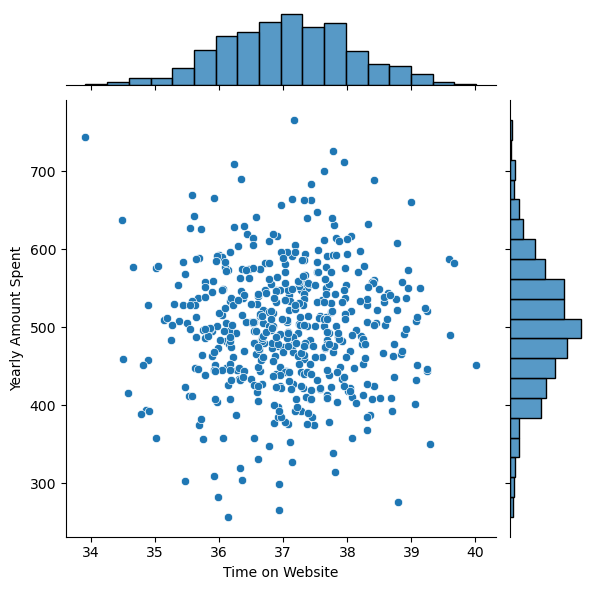

In [12]:
plt.show()

In [14]:
#Same on time on app and yearly amount spent
sns.jointplot(data=ecommerce,x='Time on App',y='Yearly Amount Spent')

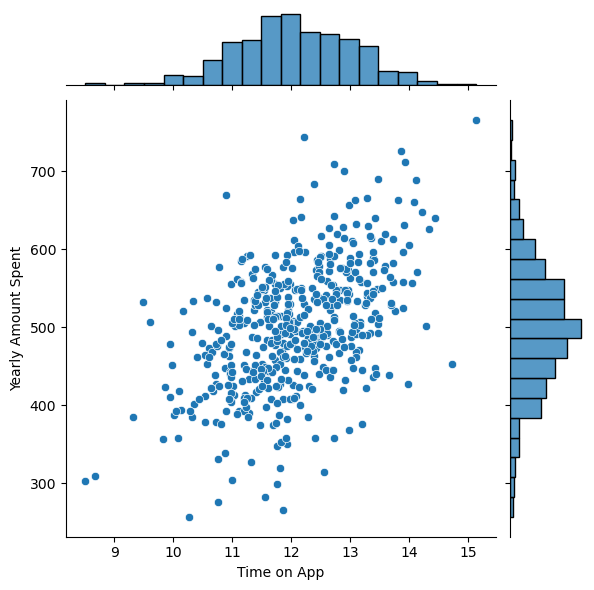

In [16]:
plt.show()

In [18]:
#jointplot to create 2D hex bin plot comparing Time on App and Length of Membership
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=ecommerce)

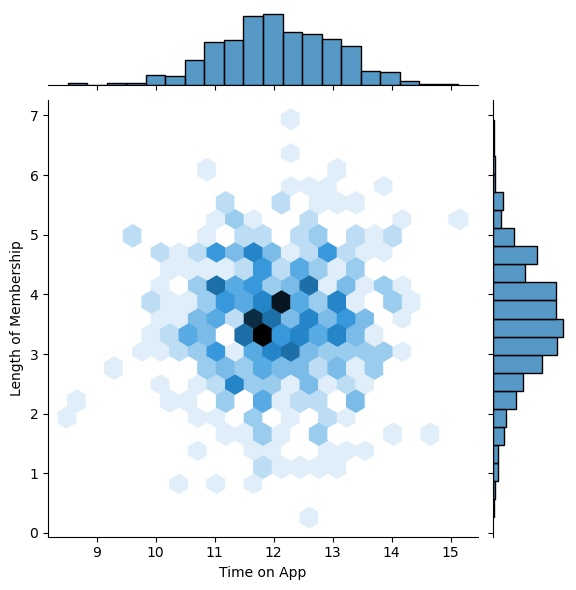

In [20]:
plt.show()

In [22]:
#pairplot to explore relationships across the entire data set
sns.pairplot(ecommerce)

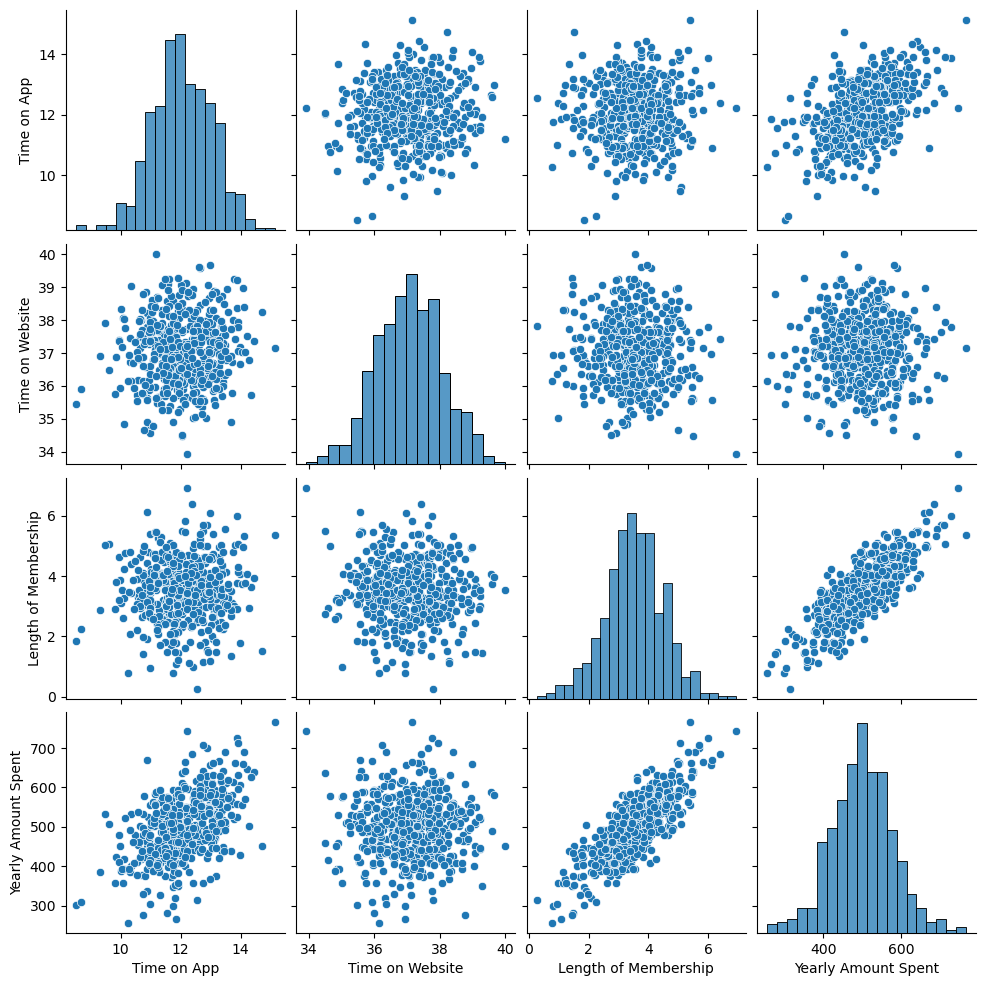

In [24]:
plt.show()

In [26]:
#based on this plot what looks like the most correlated feature with Yearly amount spent
#length of membership

In [28]:
#linear model plot of yearly amount spent vs length of membership
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=ecommerce)

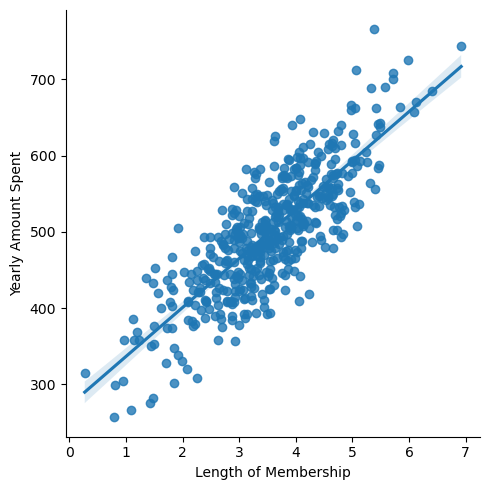

In [30]:
plt.show()

In [32]:
#after exploring the data, we are now splitting the data into training and testing sets
#setting x to numerical features of the ecommerce customer data and variable y equal to the yearly amount spent
ecommerce.columns

Index(['\tEmail', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [44]:
y = ecommerce['Yearly Amount Spent']

In [46]:
X = ecommerce[['Time on App', 'Time on Website','Length of Membership', 'Yearly Amount Spent']]

In [48]:
#split the data into training and test sets
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [54]:
#Train the model
from sklearn.linear_model import LinearRegression

In [56]:
lm = LinearRegression() #creating an instancee of linearRegression() model named lm

In [58]:
#Train/fit lm on the training data
lm.fit(X_train,y_train)

LinearRegression()

In [60]:
#printing thee coefficients
lm.coef_

array([-1.26551657e-14, -2.70894418e-14,  5.46188528e-15,  1.00000000e+00])

In [62]:
#lm.predict() to predict off the X_test set of the data
predictions = lm.predict(X_test)

In [68]:
#scatterplot of the real test values versus the predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

Text(0, 0.5, 'Predicted Values')

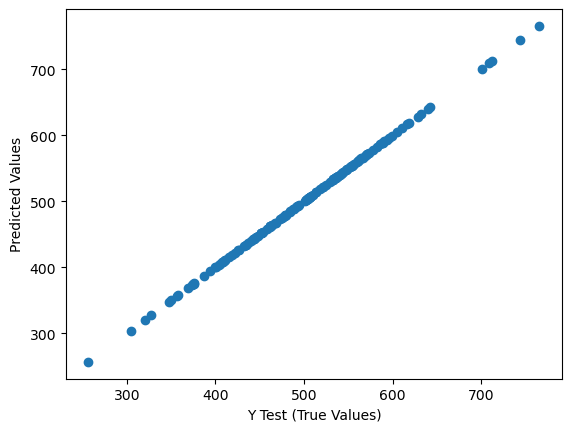

In [70]:
plt.show()

In [74]:
#evaluate the model (calculate the residual sum of squares and variance score r^2)
#mean absolute error, mean squared error, root mean squared error
from sklearn import metrics

In [76]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.661160346586257e-14
MSE: 4.8467614016778965e-27
RMSE: 6.961868572213853e-14


In [78]:
metrics.explained_variance_score(y_test, predictions)

1.0

In [82]:
#residuals
#plot a histogram of the residuals and make sure it looks manually distributed. 
sns.histplot((y_test-predictions), bins=50)

<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

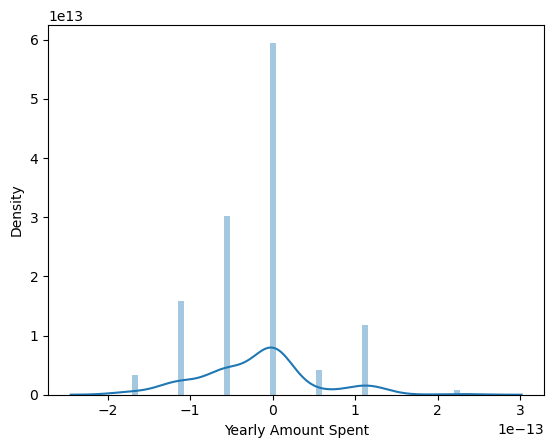

In [84]:
plt.show()

In [86]:
#to find - do we focus our efforts on mobile app or website development. Or may be that doesn't even really matter and membership Time is what is really important
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

,Coeff
Time on App,-1.265517e-14
Time on Website,-2.708944e-14
Length of Membership,5.461885e-15
Yearly Amount Spent,1.000000e+00
